In [1]:
import pandas as pd
import numpy as np
import csv
import copy
from collections import defaultdict

In [2]:
#Import all the data

#Households data
vehicle_fuel_type_data = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/survey_vehicles.csv', encoding = "ISO-8859-1")

#Vehicle trip data
vgps_trips_big_data = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/v_gpstrips.csv', encoding = "ISO-8859-1")

In [4]:
vehicle_fuel_type_info = vehicle_fuel_type_data[['sampno', 'vehno', 'fuel_type1']]
vehicle_fuel_type_info

,sampno,vehno,fuel_type1
0,7156986,2,1.0
1,7156986,3,1.0
2,7157693,1,1.0
3,7158808,1,1.0
4,7158808,2,1.0
5,7158870,1,1.0
6,7158870,2,1.0
7,7159089,1,1.0
8,7159089,2,1.0
9,7160186,1,1.0


In [5]:
vgps_trips = vgps_trips_big_data[['sampno', 'vehno']]
vgps_trips.head(5)

,sampno,vehno
0,1776019,2
1,2759536,2
2,2055542,1
3,2556033,1
4,2759536,1


In [8]:
d = defaultdict(lambda: defaultdict(int))

for row in vehicle_fuel_type_info.values:
    sampno = int(row[0])
    vehno = int(row[1])
    fuelType = row[2]
    
    d[sampno][vehno] = fuelType
    
d

defaultdict(<function __main__.<lambda>()>,
            {7156986: defaultdict(int, {2: 1.0, 3: 1.0, 1: 1.0}),
             7157693: defaultdict(int, {1: 1.0}),
             7158808: defaultdict(int, {1: 1.0, 2: 1.0}),
             7158870: defaultdict(int, {1: 1.0, 2: 1.0}),
             7159089: defaultdict(int, {1: 1.0, 2: 1.0}),
             7160186: defaultdict(int, {1: 1.0, 2: 1.0}),
             7163193: defaultdict(int, {1: 1.0, 2: 1.0}),
             7163480: defaultdict(int, {1: 1.0, 2: 1.0}),
             7163555: defaultdict(int, {1: 1.0}),
             7163889: defaultdict(int, {1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}),
             7164822: defaultdict(int, {1: 1.0, 2: 1.0}),
             7165540: defaultdict(int, {1: 1.0, 2: 1.0}),
             7168791: defaultdict(int, {1: 1.0, 2: 1.0, 3: 1.0}),
             7168963: defaultdict(int, {1: 1.0, 2: 1.0, 3: 1.0}),
             7169214: defaultdict(int, {1: 1.0, 2: 1.0}),
             7169686: defaultdict(int, {1: 1.0, 2: 1.0, 3: 1.0

In [10]:
count = defaultdict(int)

for trip in vgps_trips.values:
    trip_sampno = trip[0]
    trip_vehno = trip[1]
    
    trip_fuel_type_x = d[trip_sampno][trip_vehno]
    
    if count[trip_fuel_type_x] == 0:
        count[trip_fuel_type_x] = 1
        
    elif count[trip_fuel_type_x] != 0:
        count[trip_fuel_type_x] += 1

In [11]:
count

defaultdict(int, {1.0: 18368, 0: 82, 2.0: 541, 5.0: 54, 3.0: 14, 4.0: 16})

In [12]:
#turn a dictionary into a dataframe
count_df = pd.DataFrame(list(count.items()), columns=['vehicle_make', 'count'])
count_df

#drop 0's bc default dics

,vehicle_make,count
0,1.0,18368
1,0.0,82
2,2.0,541
3,5.0,54
4,3.0,14
5,4.0,16


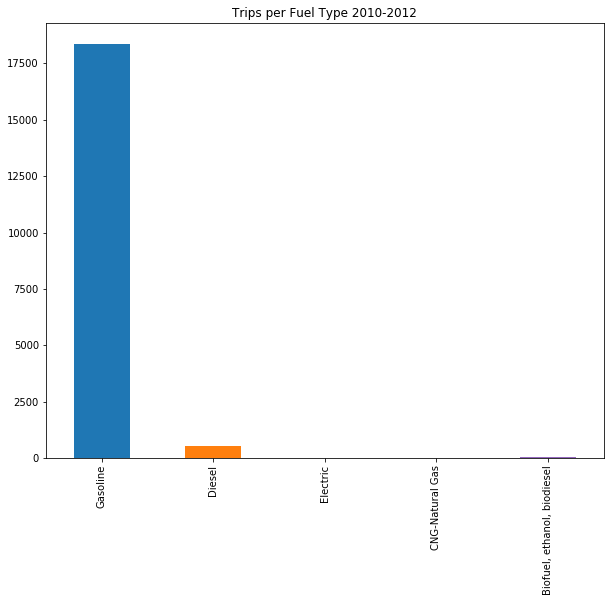

In [15]:
#build the Series
trip_counts_Series = pd.Series([18368, 541, 14, 16, 54], index= ['Gasoline','Diesel','Electric','CNG-Natural Gas','Biofuel, ethanol, biodiesel'])

#build the plot from "trip_counts_Series"
trip_count_plot = trip_counts_Series.plot(kind='bar', title="Trips per Fuel Type 2010-2012", figsize=(10,8))
